# TelecomX LATAM

#### Diccionario de datos inicial

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

# Imports

In [36]:
import pandas as pd
import numpy as np

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracción

In [38]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)

df=pd.DataFrame(datos)
df.sample(3)

,customerID,Churn,customer,phone,internet,account
4192,5759-RCVCB,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6770,9347-AERRL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
2454,3422-LYEPQ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [40]:
# Exploramos cada uno de los datos complejos para identificar su estructura.
df['customer'][0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [41]:
df['phone'][0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [42]:
df['internet'][0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [43]:
df['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [44]:
# Normalizamos los datos anidados.
columnas_anidadas = ['customer', 'phone', 'internet', 'account']
df_normalizados = [pd.json_normalize(df[col]).add_prefix(col + '.') for col in columnas_anidadas]
df = pd.concat([df.drop(columns=columnas_anidadas)] + df_normalizados, axis=1)
df.tail(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Limpieza del dataframe

In [46]:
df['customerID'].duplicated().any()

np.False_

In [47]:
df.isnull().values.any()

np.False_

In [48]:
# Se eliminan tablas con poca información estadística (account.Charges.Total = account.Charges.Monthly * customer.tenure).
df=df.drop(columns=['customerID','account.Charges.Total'], axis=1)

In [49]:
# plicamos lower() a las columnas y reemplazamos espacios si es que existen.
df.columns = df.columns.str.lower().str.replace(' ', '_').copy()

In [50]:
# Aplico .lower() a los datos.
columnas = list(df.columns)
for columna in columnas:
  if not np.issubdtype(df[columna].dtype, np.number):
    df[columna] = df[columna].map(lambda x: str(x).lower())

In [51]:
def unique_data_in_df(tabla_de_datos):
    """
    Muestra los primeros 10 valores únicos de las columnas de un DataFrame
    con valores simples (int, float, str) en lugar de np.int64/np.float64.
    """
    for columna in tabla_de_datos.columns:
        valores_unicos = tabla_de_datos[columna].unique()

        # Convertir a tipos nativos de Python y reemplazar <NA> por None
        valores_limpios = [
            (None if pd.isna(v) else int(v) if isinstance(v, (np.integer, int))
             else float(v) if isinstance(v, (np.floating, float))
             else v)
            for v in valores_unicos
        ]

        if len(valores_limpios)>10:
          print(f"{columna}: {valores_limpios[:10]} (...) hay {len(valores_limpios)} valores únicos en total.")
        else:
          print(f"{columna}: {valores_limpios}")

unique_data_in_df(df)

churn: ['no', 'yes', '']
customer.gender: ['female', 'male']
customer.seniorcitizen: [0, 1]
customer.partner: ['yes', 'no']
customer.dependents: ['yes', 'no']
customer.tenure: [9, 4, 13, 3, 71, 63, 7, 65, 54, 72] (...) hay 73 valores únicos en total.
phone.phoneservice: ['yes', 'no']
phone.multiplelines: ['no', 'yes', 'no phone service']
internet.internetservice: ['dsl', 'fiber optic', 'no']
internet.onlinesecurity: ['no', 'yes', 'no internet service']
internet.onlinebackup: ['yes', 'no', 'no internet service']
internet.deviceprotection: ['no', 'yes', 'no internet service']
internet.techsupport: ['yes', 'no', 'no internet service']
internet.streamingtv: ['yes', 'no', 'no internet service']
internet.streamingmovies: ['no', 'yes', 'no internet service']
account.contract: ['one year', 'month-to-month', 'two year']
account.paperlessbilling: ['yes', 'no']
account.paymentmethod: ['mailed check', 'electronic check', 'credit card (automatic)', 'bank transfer (automatic)']
account.charges.month

In [52]:
# Dado que para nuestro análisis es importante la columna "churn" eliminaremos las filas con valores vacios.
print("Número de filas antes de limpiar:", len(df))
# Detectar cuántas filas con churn vacío.
print("Valores vacíos en 'churn':", (df['churn'] == '').sum())
# Eliminar esas filas.
df = df[df['churn'] != ''].copy()
print("Número de filas después de limpiar:", len(df))

Número de filas antes de limpiar: 7267
Valores vacíos en 'churn': 224
Número de filas después de limpiar: 7043


In [53]:
def map_yes_no_nan(col):
    """
    Mapea 'yes' -> 1, 'no' -> 0, y cualquier otro valor -> NaN.
    Devuelve un entero nullable (Int64) para permitir NaN sin pasar a float.
    """
    return col.map({'yes': 1, 'no': 0}).astype('Int64')

cols_to_map = [
    'churn', 'customer.partner', 'customer.dependents',
    'internet.onlinesecurity', 'internet.onlinebackup',
    'internet.deviceprotection', 'internet.techsupport',
    'internet.streamingtv', 'internet.streamingmovies',
    'phone.multiplelines', 'phone.phoneservice',
    'account.paperlessbilling'
]

for col in cols_to_map:
  df[col] = map_yes_no_nan(df[col])

In [54]:
df['customer.gender'] = df['customer.gender'].map({'female':0, 'male':1})
df['internet.internetservice'] = df['internet.internetservice'].map({'no':0, 'dsl':1, 'fiber optic':2})
df['account.contract'] = df['account.contract'].map({'month-to-month':0, 'one year':1,  'two year':2})
df['account.paymentmethod'] = df['account.paymentmethod'].map({'mailed check':0, 'electronic check':1, 'credit card (automatic)':2, 'bank transfer (automatic)':3})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7043 non-null   Int64  
 1   customer.gender            7043 non-null   int64  
 2   customer.seniorcitizen     7043 non-null   int64  
 3   customer.partner           7043 non-null   Int64  
 4   customer.dependents        7043 non-null   Int64  
 5   customer.tenure            7043 non-null   int64  
 6   phone.phoneservice         7043 non-null   Int64  
 7   phone.multiplelines        6361 non-null   Int64  
 8   internet.internetservice   7043 non-null   int64  
 9   internet.onlinesecurity    5517 non-null   Int64  
 10  internet.onlinebackup      5517 non-null   Int64  
 11  internet.deviceprotection  5517 non-null   Int64  
 12  internet.techsupport       5517 non-null   Int64  
 13  internet.streamingtv       5517 non-null   Int64  
 1

In [56]:
# Asumimos un mes de 30 días
cuentas_diarias = (df['account.charges.monthly']/30).round(2)
cuentas_diarias.name = 'cuenta_cargos_diarios'
df = pd.concat([df,cuentas_diarias],axis=1)
df['cuenta_cargos_diarios'].head()

,cuenta_cargos_diarios
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80


In [57]:
df.rename(columns={
    'churn': 'evacion',
    'customer.gender': 'cliente_genero',
    'customer.seniorcitizen': 'cliente_ciudadano_mayor',
    'customer.partner': 'cliente_pareja',
    'customer.dependents': 'cliente_dependientes',
    'customer.tenure': 'cliente_antiguedad_meses',
    'phone.phoneservice': 'telefono_servicio',
    'phone.multiplelines': 'telefono_multiples_lineas',
    'internet.internetservice': 'internet_servicio',
    'internet.onlinesecurity': 'internet_seguridad_en_linea',
    'internet.onlinebackup': 'internet_respaldo_en_linea',
    'internet.deviceprotection': 'internet_proteccion_dispositivo',
    'internet.techsupport': 'internet_soporte_tecnico',
    'internet.streamingtv': 'internet_streaming_tv',
    'internet.streamingmovies': 'internet_streaming_peliculas',
    'account.contract': 'cuenta_contrato',
    'account.paperlessbilling': 'cuenta_facturacion_electronica',
    'account.paymentmethod': 'cuenta_metodo_pago',
    'account.charges.monthly': 'cuenta_cargos_mensuales',
}, inplace=True)
df.columns

Index(['evacion', 'cliente_genero', 'cliente_ciudadano_mayor',
       'cliente_pareja', 'cliente_dependientes', 'cliente_antiguedad_meses',
       'telefono_servicio', 'telefono_multiples_lineas', 'internet_servicio',
       'internet_seguridad_en_linea', 'internet_respaldo_en_linea',
       'internet_proteccion_dispositivo', 'internet_soporte_tecnico',
       'internet_streaming_tv', 'internet_streaming_peliculas',
       'cuenta_contrato', 'cuenta_facturacion_electronica',
       'cuenta_metodo_pago', 'cuenta_cargos_mensuales',
       'cuenta_cargos_diarios'],
      dtype='object')

In [58]:
unique_data_in_df(df)

evacion: [0, 1]
cliente_genero: [0, 1]
cliente_ciudadano_mayor: [0, 1]
cliente_pareja: [1, 0]
cliente_dependientes: [1, 0]
cliente_antiguedad_meses: [9, 4, 13, 3, 71, 63, 7, 65, 54, 72] (...) hay 73 valores únicos en total.
telefono_servicio: [1, 0]
telefono_multiples_lineas: [0, 1, None]
internet_servicio: [1, 2, 0]
internet_seguridad_en_linea: [0, 1, None]
internet_respaldo_en_linea: [1, 0, None]
internet_proteccion_dispositivo: [0, 1, None]
internet_soporte_tecnico: [1, 0, None]
internet_streaming_tv: [1, 0, None]
internet_streaming_peliculas: [0, 1, None]
cuenta_contrato: [1, 0, 2]
cuenta_facturacion_electronica: [1, 0]
cuenta_metodo_pago: [0, 1, 2, 3]
cuenta_cargos_mensuales: [65.6, 59.9, 73.9, 98.0, 83.9, 69.4, 109.7, 84.65, 48.2, 90.45] (...) hay 1585 valores únicos en total.
cuenta_cargos_diarios: [2.19, 2.0, 2.46, 3.27, 2.8, 2.31, 3.66, 2.82, 1.61, 3.02] (...) hay 321 valores únicos en total.


In [59]:
# Filtrar las filas donde la cantidad de meses es 0
filtro = df['cliente_antiguedad_meses'] == 0
no_meses = df.index[filtro].tolist()
print(f"Filas index: {no_meses}")
df_meses_sin_cero = df.drop(index=no_meses)

Filas index: [975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]


In [60]:
unique_data_in_df(df_meses_sin_cero)

evacion: [0, 1]
cliente_genero: [0, 1]
cliente_ciudadano_mayor: [0, 1]
cliente_pareja: [1, 0]
cliente_dependientes: [1, 0]
cliente_antiguedad_meses: [9, 4, 13, 3, 71, 63, 7, 65, 54, 72] (...) hay 72 valores únicos en total.
telefono_servicio: [1, 0]
telefono_multiples_lineas: [0, 1, None]
internet_servicio: [1, 2, 0]
internet_seguridad_en_linea: [0, 1, None]
internet_respaldo_en_linea: [1, 0, None]
internet_proteccion_dispositivo: [0, 1, None]
internet_soporte_tecnico: [1, 0, None]
internet_streaming_tv: [1, 0, None]
internet_streaming_peliculas: [0, 1, None]
cuenta_contrato: [1, 0, 2]
cuenta_facturacion_electronica: [1, 0]
cuenta_metodo_pago: [0, 1, 2, 3]
cuenta_cargos_mensuales: [65.6, 59.9, 73.9, 98.0, 83.9, 69.4, 109.7, 84.65, 48.2, 90.45] (...) hay 1584 valores únicos en total.
cuenta_cargos_diarios: [2.19, 2.0, 2.46, 3.27, 2.8, 2.31, 3.66, 2.82, 1.61, 3.02] (...) hay 321 valores únicos en total.


In [61]:
df_meses_sin_cero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   evacion                          7032 non-null   Int64  
 1   cliente_genero                   7032 non-null   int64  
 2   cliente_ciudadano_mayor          7032 non-null   int64  
 3   cliente_pareja                   7032 non-null   Int64  
 4   cliente_dependientes             7032 non-null   Int64  
 5   cliente_antiguedad_meses         7032 non-null   int64  
 6   telefono_servicio                7032 non-null   Int64  
 7   telefono_multiples_lineas        6352 non-null   Int64  
 8   internet_servicio                7032 non-null   int64  
 9   internet_seguridad_en_linea      5512 non-null   Int64  
 10  internet_respaldo_en_linea       5512 non-null   Int64  
 11  internet_proteccion_dispositivo  5512 non-null   Int64  
 12  internet_soporte_tecnico 

### Diccionario de datos final

| Variable | Tipo | Valores | Significado de cada valor | Descripción |
|----------|------|---------|--------------------------|-------------|
| `evacion` | int | 0, 1 | 0 = No canceló el servicio; 1 = Canceló el servicio | Indica si el cliente dejó la empresa |
| `cliente_genero` | int | 0, 1 | 0 = Femenino; 1 = Masculino | Género del cliente |
| `cliente_ciudadano_mayor` | int | 0, 1 | 0 = Menor de 65 años; 1 = Igual o mayor a 65 años | Indica si el cliente tiene 65 años o más |
| `cliente_pareja` | int | 0, 1 | 0 = No tiene pareja; 1 = Tiene pareja | Indica si el cliente vive o mantiene relación de pareja |
| `cliente_dependientes` | int | 0, 1 | 0 = No tiene personas a cargo; 1 = Tiene dependientes | Indica si el cliente tiene personas a su cuidado |
| `cliente_antiguedad_meses` | int | - | - | Número de meses que el cliente ha mantenido el contrato |
| `telefono_servicio` | int | 0, 1 | 0 = No tiene servicio telefónico; 1 = Tiene servicio telefónico | Indica si el cliente tiene línea telefónica |
| `telefono_multiples_lineas` | int / NaN | 0, 1, NaN | 0 = Una sola línea; 1 = Más de una línea; NaN = No tiene servicio telefónico | Indica si el cliente tiene múltiples líneas |
| `internet_servicio` | int | 0, 1, 2 | 0 = No tiene internet; 1 = DSL; 2 = Fibra óptica | Tipo de servicio de internet contratado |
| `internet_seguridad_en_linea` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio adicional de seguridad en línea |
| `internet_respaldo_en_linea` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio adicional de backup en línea |
| `internet_proteccion_dispositivo` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de protección de dispositivos |
| `internet_soporte_tecnico` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de soporte técnico especializado |
| `internet_streaming_tv` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de televisión por streaming |
| `internet_streaming_peliculas` | int / NaN | 0, 1, NaN | 0 = No; 1 = Sí; NaN = No tiene servicio de internet | Servicio de películas por streaming |
| `cuenta_contrato` | int | 0, 1, 2 | 0 = Mensual; 1 = Anual; 2 = Bienal | Tipo de contrato vigente |
| `cuenta_facturacion_electronica` | int | 0, 1 | 0 = Recibe factura en papel; 1 = Recibe factura electrónica | Indica si la facturación es digital |
| `cuenta_metodo_pago` | int | 0, 1, 2, 3 | 0 = Cuenta por correo; 1 = Cuenta electrónico; 2 = Tarjeta de crédito (automático); 3 = Transferencia bancaria (automático) | Método de pago del cliente |
| `cuenta_cargos_mensuales` | float | - | - | Monto mensual facturado al cliente |
| `cuenta_cargos_diarios` | float | - | - | Costo promedio diario calculado a partir del plan mensual |


#📊 Carga y análisis

In [62]:
columnas_numericas = ['cliente_antiguedad_meses', 'cuenta_cargos_mensuales', 'cuenta_cargos_diarios']
df_meses_sin_cero[columnas_numericas].describe()

,cliente_antiguedad_meses,cuenta_cargos_mensuales,cuenta_cargos_diarios
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2.159891
std,24.545260,30.085974,1.002955
min,1.000000,18.250000,0.610000
25%,9.000000,35.587500,1.187500
50%,29.000000,70.350000,2.340000
75%,55.000000,89.862500,2.992500
max,72.000000,118.750000,3.960000


In [63]:
def analizar_distribuciones(df, columnas_numericas, filtro=None):
    """
    Imprime la distribución de valores por columna descriptiva (no numérica),
    junto con su porcentaje de ocurrencia. Si se pasa un filtro, se aplica antes del análisis.

    Parámetros:
        df (pd.DataFrame): El DataFrame a analizar.
        columnas_numericas (list): Lista con nombres de columnas numéricas a excluir.
        filtro (pd.Series, opcional): Filtro booleano para aplicar al DataFrame.

    Retorna:
        dict: Diccionario con porcentajes por columna.
    """
    if filtro is not None:
        df = df[filtro]
        print("\n[ANÁLISIS FILTRADO]")
    else:
        print("\n[ANÁLISIS COMPLETO]")

    porcentajes_por_columna = {}

    for idx_col, col in enumerate(df.columns, start=1):
        if col in columnas_numericas:
            continue  # Saltar columnas numéricas

        valores = df[col].value_counts(dropna=False)
        porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

        print(f"\n{idx_col}. Columna: {col}")
        for idx_val, valor in enumerate(valores.index, start=1):
            print(f"    [{idx_val}] Valor {valor}: {valores[valor]} registros ({porcentajes[valor]:.2f}%)")

        suma_total = porcentajes.sum()
        print(f"    → Total porcentaje: {suma_total:.2f}%")

    return porcentajes_por_columna

In [64]:
distribucion_completa = analizar_distribuciones(df, columnas_numericas)


[ANÁLISIS COMPLETO]

1. Columna: evacion
    [1] Valor 0: 5174 registros (73.46%)
    [2] Valor 1: 1869 registros (26.54%)
    → Total porcentaje: 100.00%

2. Columna: cliente_genero
    [1] Valor 1: 3555 registros (50.48%)
    [2] Valor 0: 3488 registros (49.52%)
    → Total porcentaje: 100.00%

3. Columna: cliente_ciudadano_mayor
    [1] Valor 0: 5901 registros (83.79%)
    [2] Valor 1: 1142 registros (16.21%)
    → Total porcentaje: 100.00%

4. Columna: cliente_pareja
    [1] Valor 0: 3641 registros (51.70%)
    [2] Valor 1: 3402 registros (48.30%)
    → Total porcentaje: 100.00%

5. Columna: cliente_dependientes
    [1] Valor 0: 4933 registros (70.04%)
    [2] Valor 1: 2110 registros (29.96%)
    → Total porcentaje: 100.00%

7. Columna: telefono_servicio
    [1] Valor 1: 6361 registros (90.32%)
    [2] Valor 0: 682 registros (9.68%)
    → Total porcentaje: 100.00%

8. Columna: telefono_multiples_lineas
    [1] Valor 0: 3390 registros (48.13%)
    [2] Valor 1: 2971 registros (42.18

In [65]:
distribucion_filtrada = analizar_distribuciones(df, columnas_numericas, filtro=(df["evacion"] == 1))


[ANÁLISIS FILTRADO]

1. Columna: evacion
    [1] Valor 1: 1869 registros (100.00%)
    → Total porcentaje: 100.00%

2. Columna: cliente_genero
    [1] Valor 0: 939 registros (50.24%)
    [2] Valor 1: 930 registros (49.76%)
    → Total porcentaje: 100.00%

3. Columna: cliente_ciudadano_mayor
    [1] Valor 0: 1393 registros (74.53%)
    [2] Valor 1: 476 registros (25.47%)
    → Total porcentaje: 100.00%

4. Columna: cliente_pareja
    [1] Valor 0: 1200 registros (64.21%)
    [2] Valor 1: 669 registros (35.79%)
    → Total porcentaje: 100.00%

5. Columna: cliente_dependientes
    [1] Valor 0: 1543 registros (82.56%)
    [2] Valor 1: 326 registros (17.44%)
    → Total porcentaje: 100.00%

7. Columna: telefono_servicio
    [1] Valor 1: 1699 registros (90.90%)
    [2] Valor 0: 170 registros (9.10%)
    → Total porcentaje: 100.00%

8. Columna: telefono_multiples_lineas
    [1] Valor 1: 850 registros (45.48%)
    [2] Valor 0: 849 registros (45.43%)
    [3] Valor <NA>: 170 registros (9.10%)
  

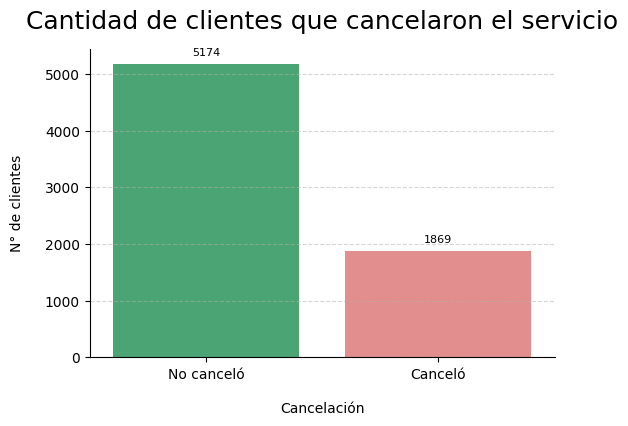

In [66]:
colores = ['mediumseagreen', 'lightcoral']
plt.figure(figsize=(6,4))
plt.subplots_adjust(hspace=0.5,wspace=0.3)
ax = sns.countplot(data=df, x='evacion', palette=colores, hue='evacion', legend=False)
plt.title('Cantidad de clientes que cancelaron el servicio', fontsize=18, pad=15)
plt.xlabel('Cancelación', labelpad=15)
plt.ylabel('N° de clientes', labelpad=15)
plt.xticks([0, 1], ['No canceló', 'Canceló'])
plt.grid(linestyle='--', alpha=0.5, linewidth=0.8, axis='y')
sns.despine()
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # valor
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición
        ha='center', va='bottom',
        fontsize=8, color='black',
        xytext=(0, 5), textcoords='offset points'
    )
plt.show()

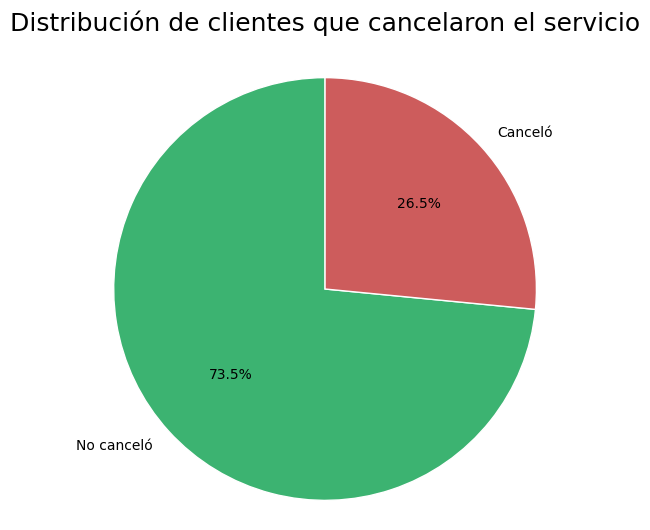

In [67]:
conteo = df['evacion'].value_counts().sort_index()

valores = conteo.values
etiquetas = ['No canceló', 'Canceló']
colores = ['mediumseagreen', 'indianred']

plt.figure(figsize=(6, 6))
plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribución de clientes que cancelaron el servicio', fontsize=18, pad=20)
plt.axis('equal')
plt.show()

In [68]:
# Diccionario de mapeo para etiquetas
label_maps = {
    'evacion': {0: 'No canceló', 1: 'Canceló'},
    'cliente_genero': {0: 'Femenino', 1: 'Masculino'},
    'cliente_ciudadano_mayor': {0: 'Menor de 65', 1: '65 o más'},
    'cliente_pareja': {0: 'Sin pareja', 1: 'Con pareja'},
    'cliente_dependientes': {0: 'Sin dependientes', 1: 'Con dependientes'},
    'telefono_servicio': {0: 'Sin teléfono', 1: 'Con teléfono'},
    'telefono_multiples_lineas': {0: 'Una línea', 1: 'Múltiples líneas', 'nan': 'Sin teléfono'},
    'internet_servicio': {0: 'Sin internet', 1: 'DSL', 2: 'Fibra óptica'},
    'internet_seguridad_en_linea': {0: 'No', 1: 'Sí', 'nan': 'Sin internet'},
    'internet_respaldo_en_linea': {0: 'No', 1: 'Sí', 'nan': 'Sin internet'},
    'internet_proteccion_dispositivo': {0: 'No', 1: 'Sí', 'nan': 'Sin internet'},
    'internet_soporte_tecnico': {0: 'No', 1: 'Sí', 'nan': 'Sin internet'},
    'internet_streaming_tv': {0: 'No', 1: 'Sí', 'nan': 'Sin internet'},
    'internet_streaming_peliculas': {0: 'No', 1: 'Sí', 'nan': 'Sin internet'},
    'cuenta_contrato': {0: 'Mensual', 1: 'Anual', 2: 'Bienal'},
    'cuenta_facturacion_electronica': {0: 'Papel', 1: 'Electrónica'},
    'cuenta_metodo_pago': {0: 'Cuenta correo', 1: 'Cuenta electrónico', 2: 'Tarjeta crédito', 3: 'Transferencia bancaria'}
}

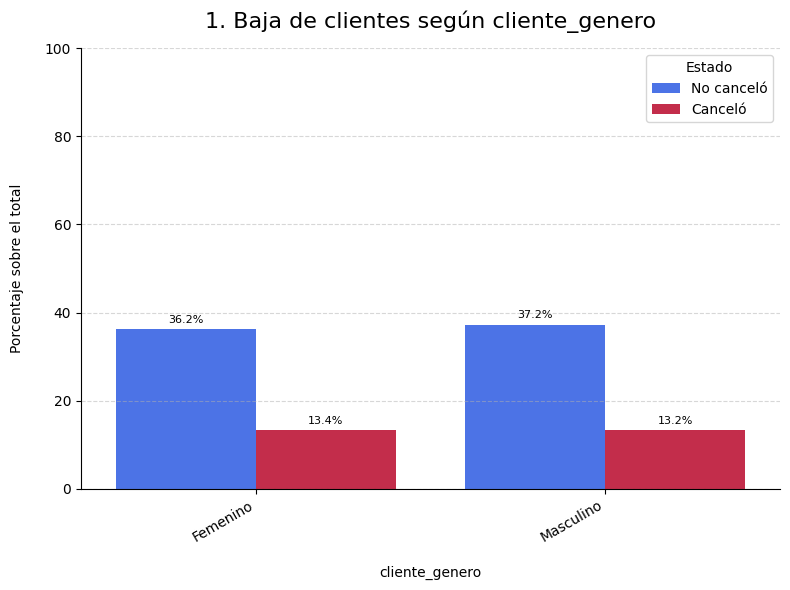

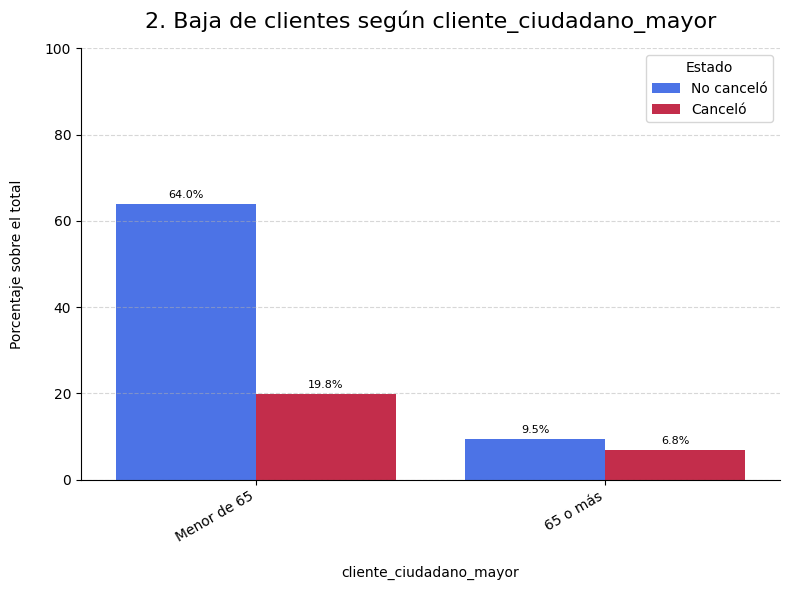

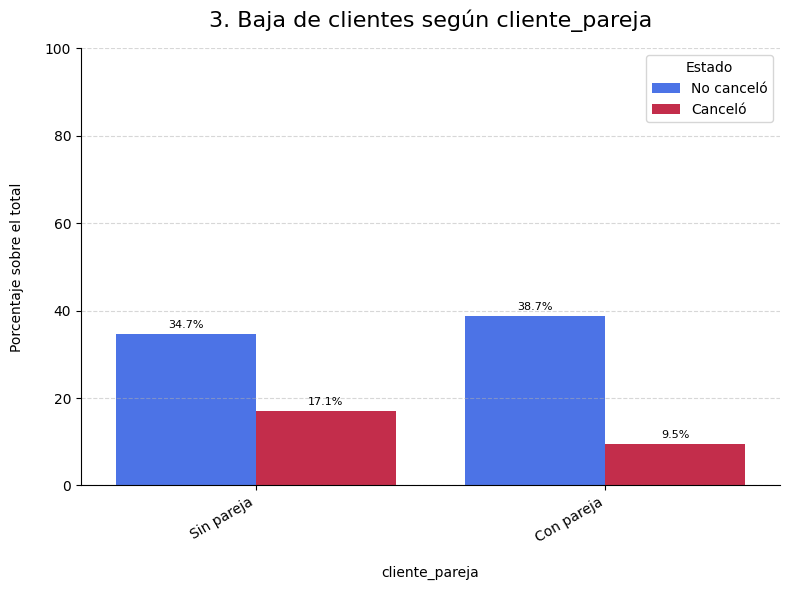

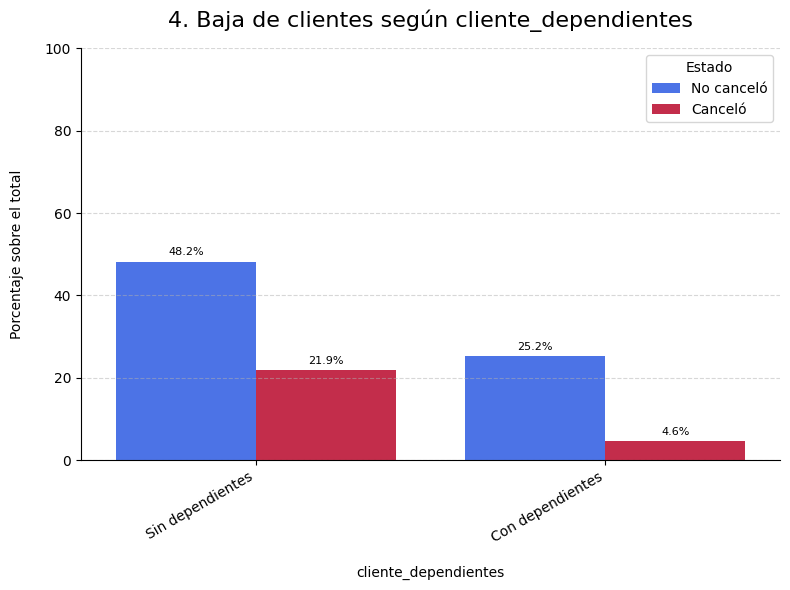

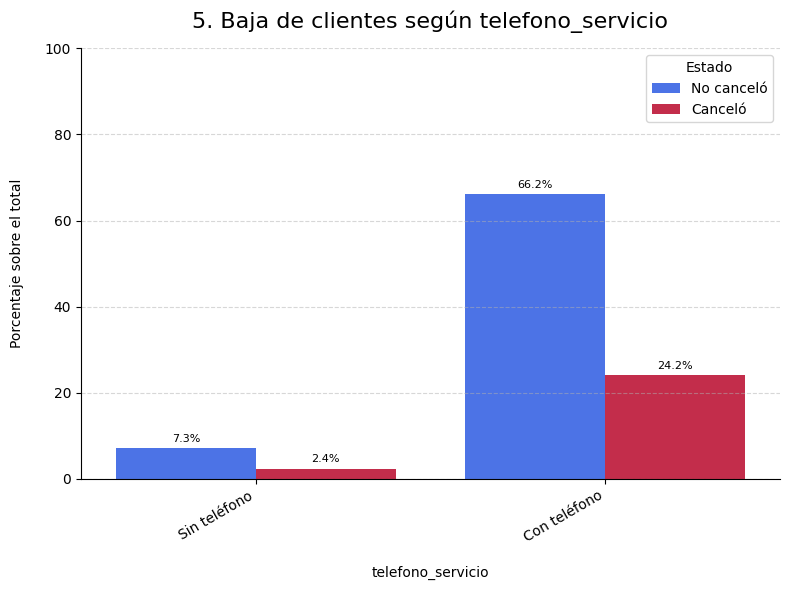

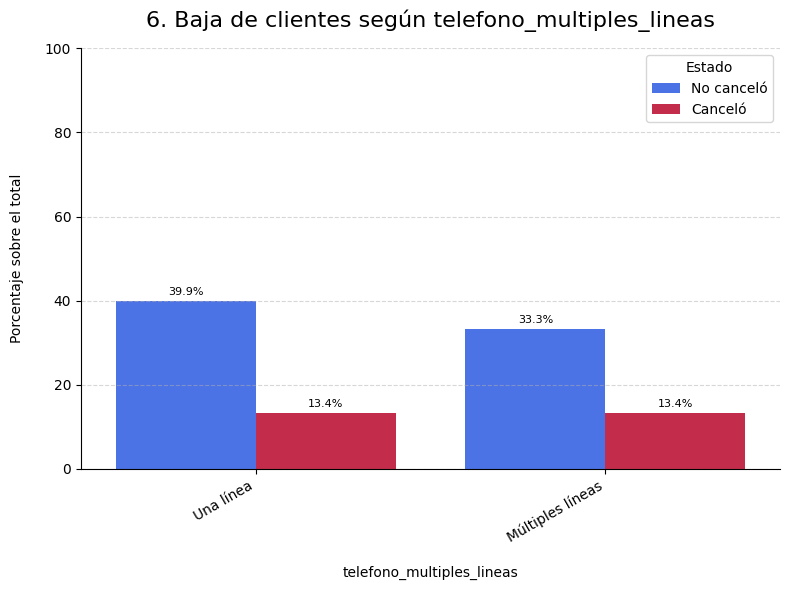

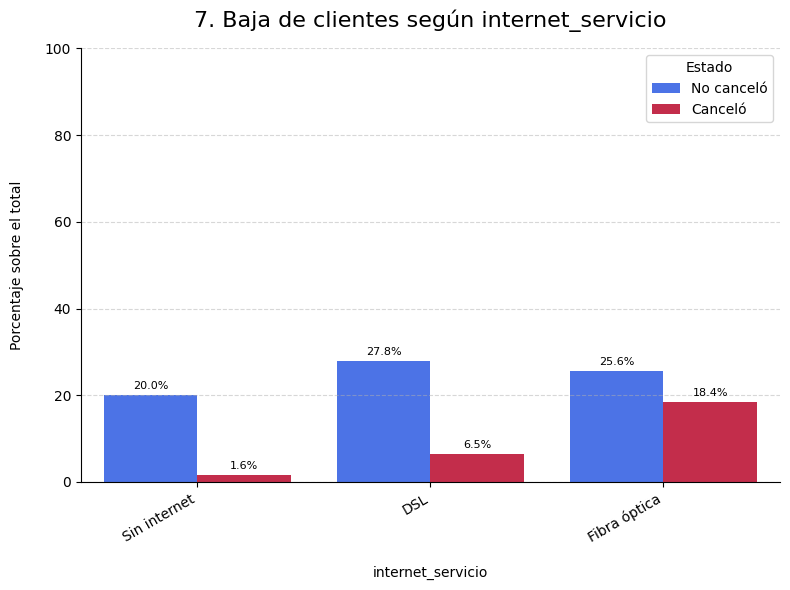

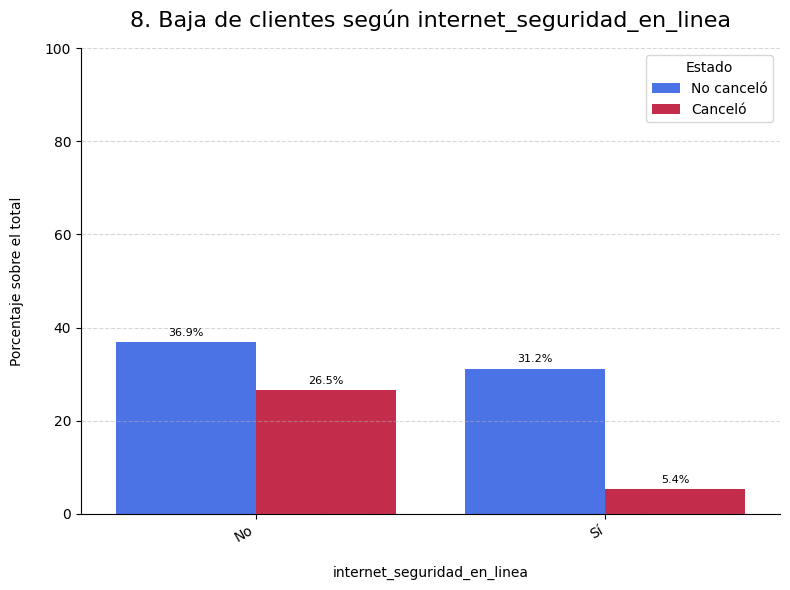

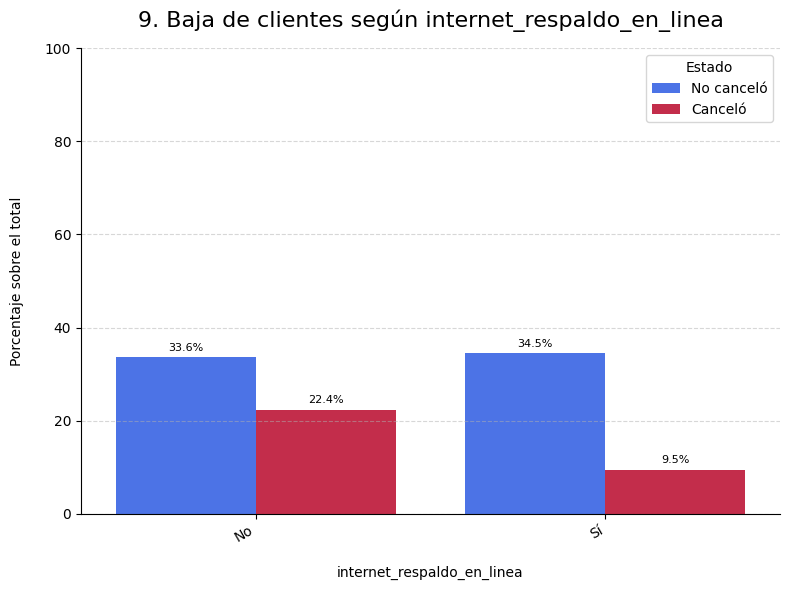

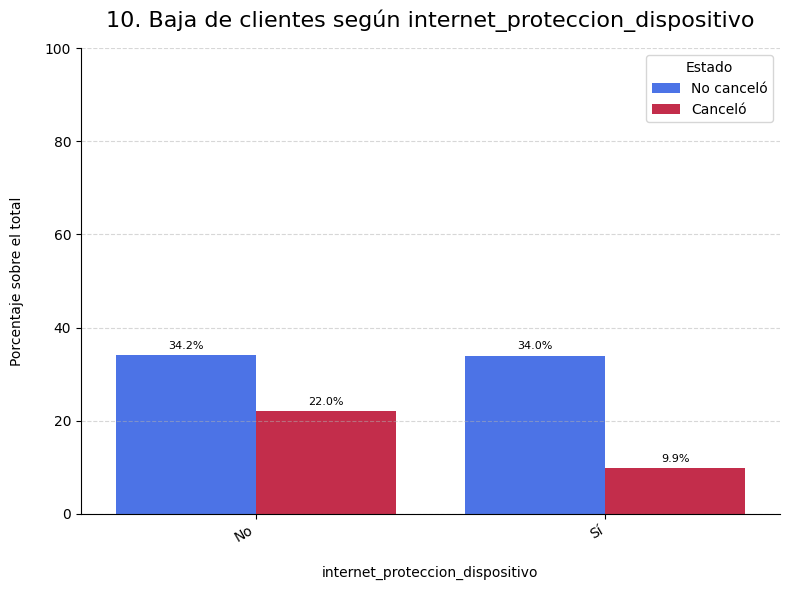

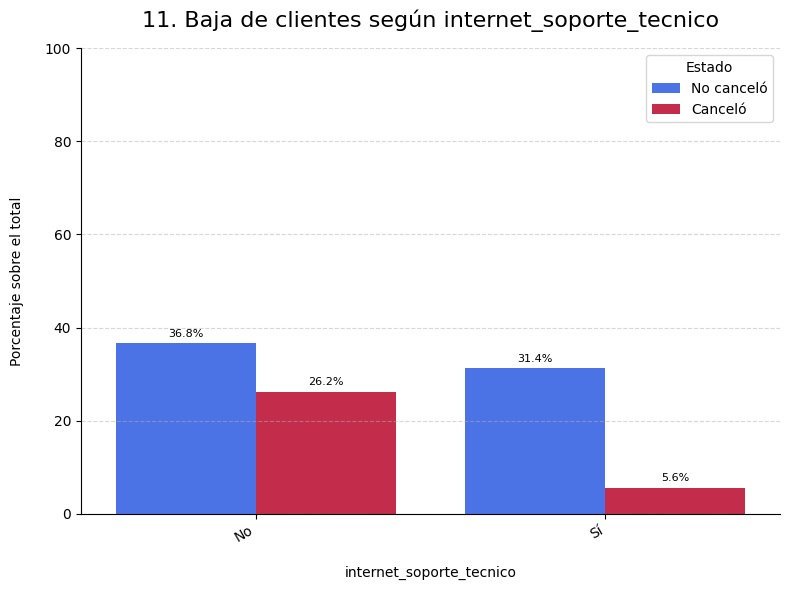

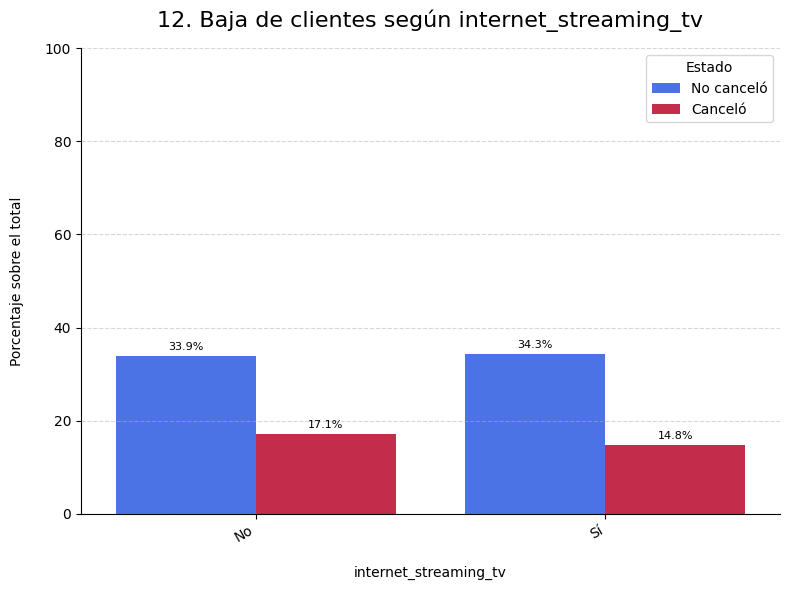

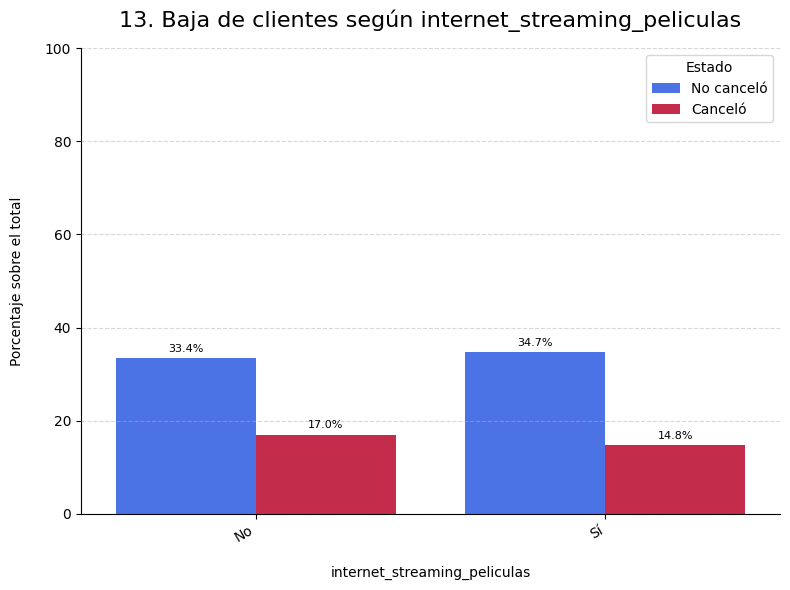

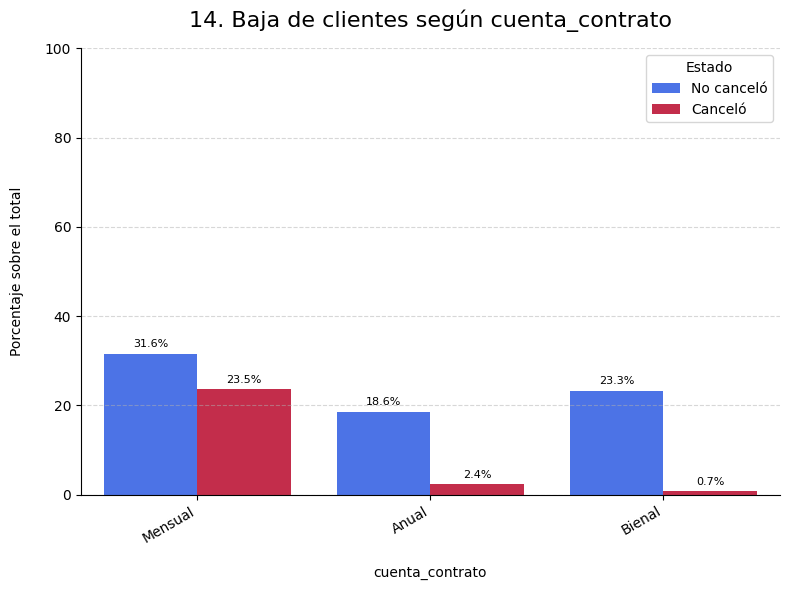

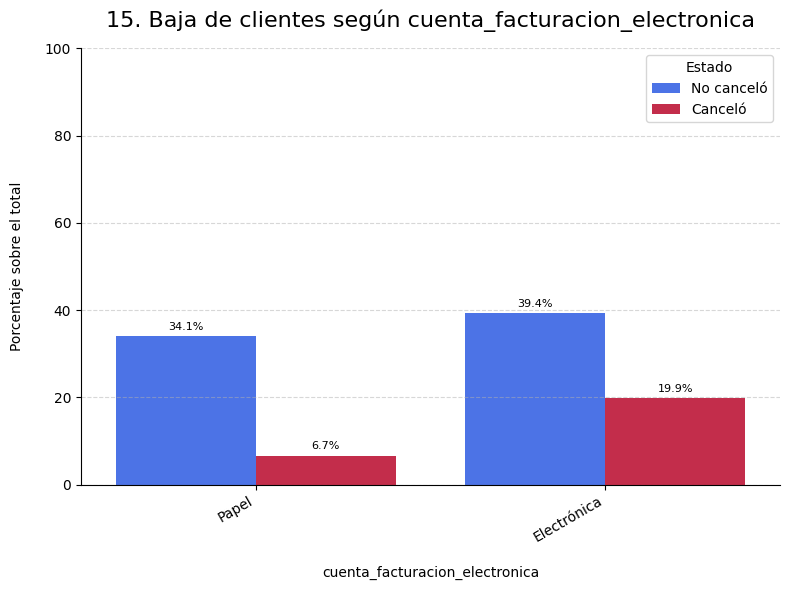

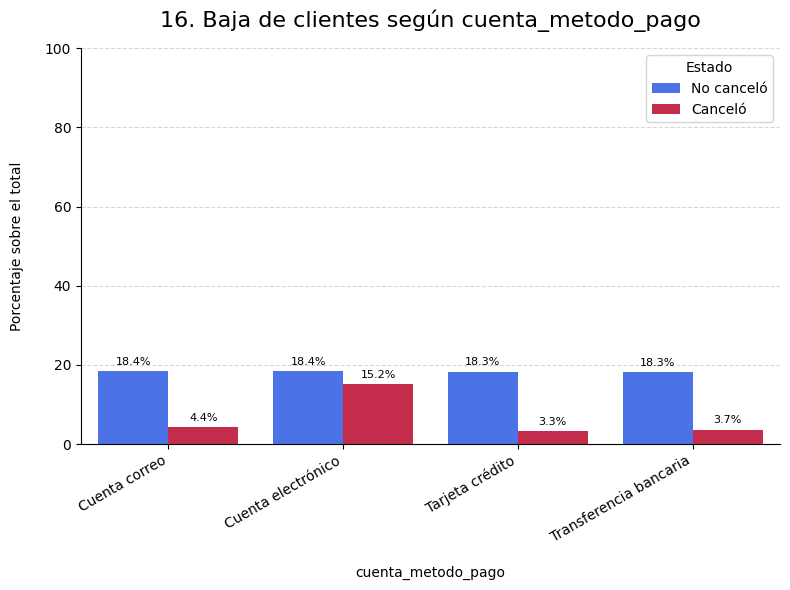

In [69]:
categoricas = [
    'cliente_genero',
    'cliente_ciudadano_mayor',
    'cliente_pareja',
    'cliente_dependientes',
    'telefono_servicio',
    'telefono_multiples_lineas',
    'internet_servicio',
    'internet_seguridad_en_linea',
    'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas',
    'cuenta_contrato',
    'cuenta_facturacion_electronica',
    'cuenta_metodo_pago'
]

estado_global = df_meses_sin_cero['evacion'].value_counts(normalize=True).rename({0: 'No canceló', 1: 'Canceló'}) * 100

for i, col in enumerate(categoricas, start=1):
    tabla = pd.crosstab(df_meses_sin_cero[col], df_meses_sin_cero['evacion'], normalize='all') * 100
    tabla = tabla.reset_index().melt(id_vars=col, value_vars=[0, 1],
                                     var_name='Estado', value_name='Porcentaje')
    tabla['Estado'] = tabla['Estado'].map({0: 'No canceló', 1: 'Canceló'})

    if col in label_maps:
        tabla[col] = tabla[col].map(label_maps[col]).fillna(tabla[col])

    plt.figure(figsize=(8,6))
    ax = sns.barplot(data=tabla, x=col, y='Porcentaje', hue='Estado',
                     palette=['#3366FF', 'crimson'])

    plt.title(f"{i}. Baja de clientes según {col}", fontsize=16, pad=15)
    plt.ylabel('Porcentaje sobre el total', labelpad=15)
    plt.xlabel(col, labelpad=15)
    plt.ylim(0, 100)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.grid(linestyle='--', alpha=0.5, linewidth=0.8, axis='y')
    sns.despine()

    for p in ax.patches:
        value = p.get_height()
        if value > 0:
            ax.annotate(f'{value:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom',
                        fontsize=8, color='black',
                        xytext=(0, 3), textcoords='offset points')

    plt.show()

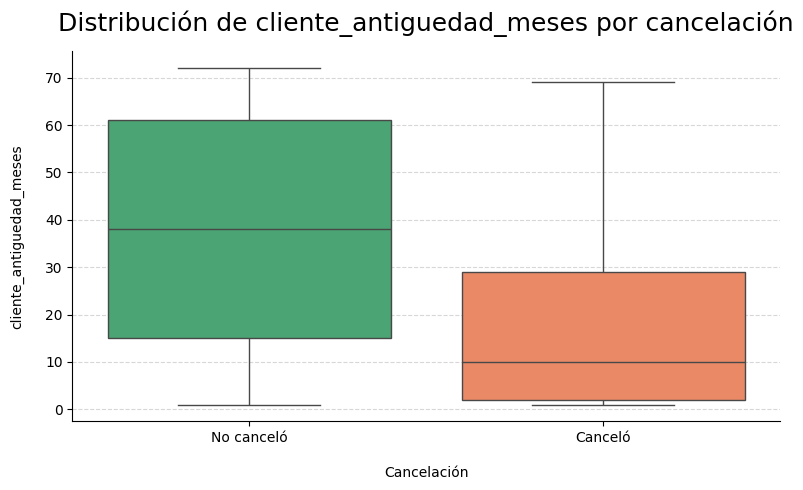

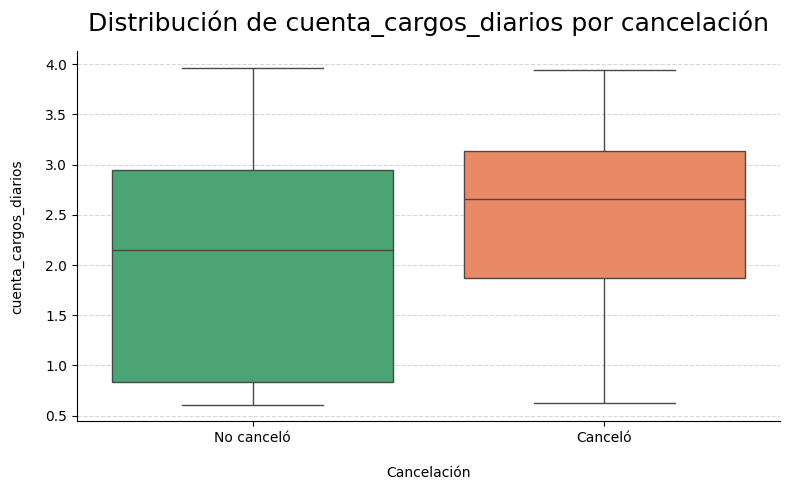

In [70]:
numericas = [
    'cliente_antiguedad_meses',
    'cuenta_cargos_diarios'
]

for col in numericas:
    plt.figure(figsize=(8,5))

    # Mapeo de etiquetas para evacion
    df_plot = df_meses_sin_cero.copy()
    df_plot['evacion'] = df_plot['evacion'].map(label_maps['evacion'])

    sns.boxplot(
        data=df_plot,
        x='evacion',
        y=col,
        hue='evacion',
        palette=['mediumseagreen', 'coral'],
        showfliers=False,        # oculta valores extremos
        legend=False
    )

    plt.title(f'Distribución de {col} por cancelación', fontsize=18, pad=15)
    plt.xlabel('Cancelación', labelpad=15)
    plt.ylabel(col, labelpad=15)
    plt.grid(linestyle='--', alpha=0.5, linewidth=0.8, axis='y')
    sns.despine()
    plt.tight_layout()
    plt.show()


# 📄Informe Final – Análisis de Evasión de Clientes (*Churn*) en TelecomX LATAM

## 1. Introducción
El presente análisis tiene como objetivo comprender los factores que influyen en la **evasión de clientes** (*Customer Churn*) dentro de la empresa ficticia **TelecomX LATAM**.  
A través de la exploración y análisis de datos, se buscó identificar patrones y características asociadas a clientes que abandonan el servicio, con el fin de proponer estrategias para reducir la tasa de *churn*.

---

## 2. Limpieza y Tratamiento de Datos
El flujo de preparación de datos incluyó las siguientes etapas:

1. **Importación de datos**:  
   - Se cargó el dataset desde un archivo JSON público.
   - Se convirtió a un DataFrame de *pandas* para facilitar su manipulación.

2. **Normalización de estructuras anidadas**:  
   - Variables como `customer`, `phone`, `internet` y `account` contenían información en formato anidado (diccionarios/JSON).
   - Se aplicó `pd.json_normalize()` para extraer estas variables y combinarlas en un solo DataFrame plano.

3. **Revisión y ajuste de tipos de datos**:  
   - Conversión de columnas numéricas almacenadas como texto (`Charges.Monthly`, `Charges.Total`).
   - Transformación de variables categóricas a formato adecuado.

4. **Tratamiento de valores nulos**:  
   - Revisión de valores faltantes y tratamiento mediante imputación o eliminación según el caso.

5. **Renombrado y estandarización**:  
   - Columnas renombradas para mantener un formato coherente.
   - Unificación de categorías para evitar duplicados semánticos.

---

## 3. Análisis Exploratorio de Datos
El análisis exploratorio (EDA) se enfocó en describir el perfil de clientes y encontrar diferencias relevantes entre quienes permanecen y quienes se dan de baja.

**Principales análisis y visualizaciones:**
- **Distribución de Churn**: proporción de clientes que abandonan vs. permanecen.
- **Variables demográficas**:
  - Mayor tasa de *churn* en clientes jóvenes y en usuarios sin pareja.
  - Clientes sin dependientes presentan una ligera mayor propensión a irse.
- **Variables de servicio**:
  - Planes de contrato mensual concentran la mayor parte del *churn*.
  - Servicios como `OnlineSecurity` y `TechSupport` están asociados a menor evasión.
- **Variables financieras**:
  - Clientes con cargos mensuales más altos muestran mayor tasa de abandono, especialmente cuando usan contratos cortos.
- **Visualizaciones**:
  - Gráficos de barras y diagramas circulares para comparar tasas.
  - Histogramas y *boxplots* para distribución de cargos.
  - Mapas de calor (*heatmaps*) para analizar correlaciones.

---

## 4. Conclusiones e Insights
- **El tipo de contrato es el predictor más fuerte del churn**: los contratos mensuales tienen tasas mucho más altas que los anuales o bianuales.
- **Servicios adicionales de valor** (seguridad en línea, soporte técnico) parecen aumentar la retención.
- **Altos cargos mensuales sin beneficios adicionales** generan insatisfacción y abandono.
- **Clientes con menor antigüedad** presentan un riesgo elevado de darse de baja.

---

## 5. Recomendaciones
1. **Incentivar contratos a largo plazo** mediante descuentos o beneficios exclusivos.
2. **Ofrecer paquetes de valor agregado** (seguridad en línea, soporte premium) a clientes con contrato mensual para aumentar la retención.
3. **Programas de fidelización** orientados a nuevos clientes durante sus primeros 6 meses.
4. **Segmentación de clientes por riesgo** para implementar campañas preventivas personalizadas.
5. **Revisión de precios y comunicación de beneficios** para clientes con cargos altos.

---

**Resumen**:  
El análisis permitió identificar patrones claros de evasión y factores que pueden ser gestionados para reducir el *churn*. Las estrategias sugeridas se centran en fortalecer la permanencia mediante valor agregado, fidelización temprana y una estructura contractual más atractiva para el cliente.
